# this notebook is for Week4-Assignment-Part 1 Trp-Cage Analysis
# author: Rui Zeng, N15471955, rz2522@nyu.edu
# Assignment: Make well labeled plots of end-end distance and radius of gyration vs time for this production trajectory

In [1]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the trajectory
xtc_file='../Data/Trp-Cage_center.xtc'
gro_file='../Data/Trp-Cage_center.gro'
traj=md.load(xtc_file,top=gro_file)
# check the simulation time in ns & the number of frames
print('The simulation time is',traj.time[-1]/1000,'ns')
print('The number of frames is',traj.n_frames)
# check topology (whether the solvents are removed)
print(traj.topology)
# print the number of non-hydrogen atoms with topology selection
# it should be 148 atoms (reference: 2JOF.pdb)
print('The number of non-hydrogen atoms is',traj.topology.select('not element H').shape[0])

The simulation time is 100.0 ns
The number of frames is 1001
<mdtraj.Topology with 1 chains, 20 residues, 284 atoms, 265 bonds>
The number of non-hydrogen atoms is 148


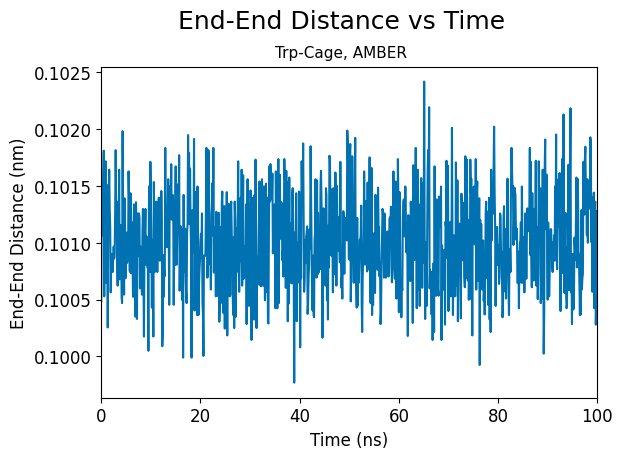

In [46]:
# figure 1: end-end distance vs time
# calculate the end-end distance
end_end_dist=md.compute_distances(traj,[[0,1]])
# plot the end-end distance vs time, colorblind-friendly
fig=plt.figure(1)
plt.plot(traj.time/1000,end_end_dist,color='#0072B2')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('End-End Distance (nm)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="End-End Distance vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Trp-Cage, AMBER", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,100)
plt.yticks(np.arange(0.1,0.103,0.0005))
# save figure as pdf in ../Figures
fname = '../Figures/fig.1-[Trp-Cage_Amber]End-End_Distance.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


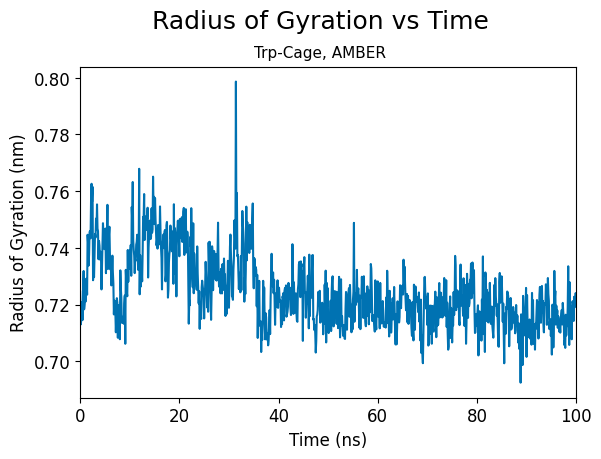

In [47]:
# figure 2: radius of gyration vs time
# calculate the radius of gyration
radius_gyration=md.compute_rg(traj)
# plot the radius of gyration vs time, colorblind-friendly
fig=plt.figure(2)
plt.plot(traj.time/1000,radius_gyration,color='#0072B2')
# set the axis labels, fontsize = 12
plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('Radius of Gyration (nm)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="Radius of Gyration vs Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Trp-Cage, AMBER", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,100)
# save figure as pdf in ../Figures
fname = '../Figures/fig.2-[Trp-Cage_Amber]Radius_of_Gyration.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


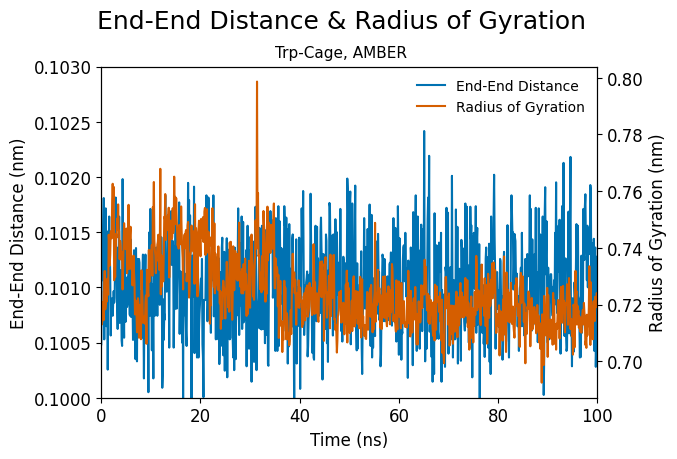

In [48]:
# figure 3: combined plot of end-end distance and radius of gyration, different y-axes
# plot the end-end distance vs time, colorblind-friendly
fig=plt.figure(3)
ax1=fig.add_subplot(111)
ax1.plot(traj.time/1000,end_end_dist,color='#0072B2')
ax1.set_xlabel('Time (ns)',fontsize=12)
ax1.set_ylabel('End-End Distance (nm)',fontsize=12)
# two lines of title
plt.text(x=0.5, y=0.88, s="End-End Distance & Radius of Gyration", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Trp-Cage, AMBER", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
# modify the tick labels to be fontsize = 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set limits for the axes
plt.xlim(0,100)
plt.ylim(0.1,0.103)
plt.yticks(np.arange(0.1,0.1031,0.0005))
# plot the radius of gyration vs time, colorblind-friendly
ax2=ax1.twinx()
ax2.plot(traj.time/1000,radius_gyration,color='#D55E00')
plt.yticks(fontsize=12)
ax2.set_ylabel('Radius of Gyration (nm)',fontsize=12)
# combined legend
fig.legend(['End-End Distance', 'Radius of Gyration'], loc='upper right', bbox_to_anchor=(1,1),bbox_transform=ax1.transAxes,frameon=False)
# save figure as pdf in ../Figures
fname = '../Figures/fig.3-[Trp-Cage_Amber]End-End_Distance_Radius_of_Gyration.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


